In [ ]:
# コンソールに書く
# function ClickConnect(){
#   console.log("60sごとに再接続");
#   document.querySelector("colab-connect-button").click()
# }
# setInterval(ClickConnect,1000*60);

In [1]:
# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install japanize-matplotlib
!pip install signate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 47.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7b887be6a51d57dda1bf584d0a56dffe839664788f35c813d1bd002ae214e07f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=23c955246714ee7a867b2952230155c92d494ebedf43f0ded9c82feec0abcf78
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
from requests import get
import os
import sys
from pathlib import Path
import shutil

import glob
import warnings
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib




from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split


from skimage import io
import random #ランダム抽出のためのライブラリ

warnings.simplefilter('ignore')

In [5]:
#signateAPI用トークンをコピー

# コピー元とコピー先のパスを指定
source_path = '/content/drive/MyDrive/Python/SIGNATE/signate.json'
destination_path = '/root/.signate/signate.json'

# 保存先ディレクトリがない場合は作成
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# ファイルをコピー
shutil.copy(source_path, destination_path)

print("signate.json copied successfully.")

signate.json copied successfully.


In [6]:
# ! signate list

#ファイル表示
! signate files --competition-id=263


  fileId  name               title                                   size  updated_at
--------  -----------------  --------------------------------  ----------  ------------
     224  train_1.zip        学習用画像データ                  1758207903
     225  train_2.zip        学習用画像データ                  1757740854
     226  train_3.zip        学習用画像データ                  1140002777
     227  test_1.zip         評価用画像データ                  1750014009
     228  test_2.zip         評価用画像データ                  1747718562
     229  test_3.zip         評価用画像データ                  1748243671
     230  test_4.zip         評価用画像データ                  1458221559
     231  train_master.tsv   学習用画像データとラベルの対応表     5812546
     232  sample_submit.tsv  応募用サンプルファイル               8034133
     233  sample_code.zip    提出用サンプルコード                18846108


In [7]:
#ファイル取得
! signate download --competition-id=263 --file-id=224
! signate download --competition-id=263 --file-id=225
! signate download --competition-id=263 --file-id=226
! signate download --competition-id=263 --file-id=231
! signate download --competition-id=263 --file-id=232

# ! signate download --competition-id=263 --file-id=227
# ! signate download --competition-id=263 --file-id=228
# ! signate download --competition-id=263 --file-id=229
# ! signate download --competition-id=263 --file-id=230
# ! signate download --competition-id=263 --file-id=233

train_1.zip


Download completed.
train_2.zip


Download completed.
train_3.zip


Download completed.
train_master.tsv


Download completed.
sample_submit.tsv


Download completed.


In [8]:
!unzip train_1.zip -d /content/
!unzip train_2.zip -d /content/
!unzip train_3.zip -d /content/

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: /content/train/train_95499.tif  
  inflating: /content/train/train_955.tif  
  inflating: /content/train/train_9550.tif  
  inflating: /content/train/train_95500.tif  
  inflating: /content/train/train_95501.tif  
  inflating: /content/train/train_95502.tif  
  inflating: /content/train/train_95503.tif  
  inflating: /content/train/train_95504.tif  
  inflating: /content/train/train_95505.tif  
  inflating: /content/train/train_95506.tif  
  inflating: /content/train/train_95507.tif  
  inflating: /content/train/train_95508.tif  
  inflating: /content/train/train_95509.tif  
  inflating: /content/train/train_9551.tif  
  inflating: /content/train/train_95510.tif  
  inflating: /content/train/train_95511.tif  
  inflating: /content/train/train_95512.tif  
  inflating: /content/train/train_95513.tif  
  inflating: /content/train/train_95514.tif  
  inflating: /content/train/train_95515.tif  
  inflating: /content/train/train_95516.tif  
  infl

In [9]:
%ls

drive/        sample_submit.tsv  train_1.zip  train_3.zip
sample_data/  train/             train_2.zip  train_master.tsv


In [10]:
# %cd /content/drive/MyDrive/Python/SIGNATE/Satellite/data
# %cd /content


In [11]:
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/train_1.zip" /content/
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/train_2.zip" /content/
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/train_3.zip" /content/
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/train_master.tsv" /content/
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/sample_submit.tsv" /content/


In [18]:
######################
# set dirs & filename
######################
comp_name = "Satellite"

if 'google.colab' in sys.modules:  # colab環境
    print("google.colab")
    INPUT_PATH = Path("/content")  # 読み込みファイル場所
    # name_notebook = get('http://172.28.0.2:9000/api/sessions').json()[0]['name'] # ノートブック名を取得
    name_notebook = "base01_Resnet18.ipynb"
    DRIVE = f"/content/drive/MyDrive/Python/SIGNATE/{comp_name}"  # このファイルの親(scr)


elif 'kaggle_web_client' in sys.modules:  # kaggle環境
    INPUT_PATH = Path("../input/")

elif 'VSCODE_CWD' in os.environ: # vscode（ローカル）用
    print("vscode")
    INPUT_PATH =  Path(f"../input/{comp_name}")  # 読み込みファイル場所
    abs_path = os.path.abspath(__file__)  # /tmp/work/src/exp/_.py'
    name_notebook = os.path.basename(abs_path) # ノート名を取得
    DRIVE = os.path.dirname(os.getcwd())  # このファイルの親(scr)

#共通
name = os.path.splitext(name_notebook)[0] # 拡張子を除去　filename
OUTPUT = os.path.join(DRIVE, "output")
OUTPUT_EXP = os.path.join(OUTPUT, name)  # logなど情報保存場所
EXP_MODEL = Path(OUTPUT_EXP, "model")  # 学習済みモデル保存








google.colab


In [20]:
train_master = pd.read_csv(INPUT_PATH /'train_master.tsv', sep='\t')
sample_submit = pd.read_csv(INPUT_PATH /'sample_submit.tsv', sep='\t', header=None)

In [21]:
train_master.head()

,file_name,flag
0,train_0.tif,0
1,train_1.tif,0
2,train_2.tif,0
3,train_3.tif,0
4,train_4.tif,0


In [ ]:
# %cd /content/drive/MyDrive/Python/SIGNATE/Satellite/data

In [22]:
pos = train_master.loc[train_master['flag']==1]
neg = train_master.loc[train_master['flag']==0]
print(f'学習データ件数: {len(train_master)}')
print(f'正例件数: {len(pos)}')
print(f'負例件数: {len(neg)}')
print(f'正例割合: {round(len(pos)/len(train_master), 3)}')

学習データ件数: 296182
正例件数: 12442
負例件数: 283740
正例割合: 0.042


In [23]:
sample_submit.head()

,0,1
0,test_0.tif,0
1,test_1.tif,0
2,test_2.tif,0
3,test_3.tif,1
4,test_4.tif,1


In [24]:
print(f'テストデータ件数: {len(sample_submit)}')

テストデータ件数: 428697


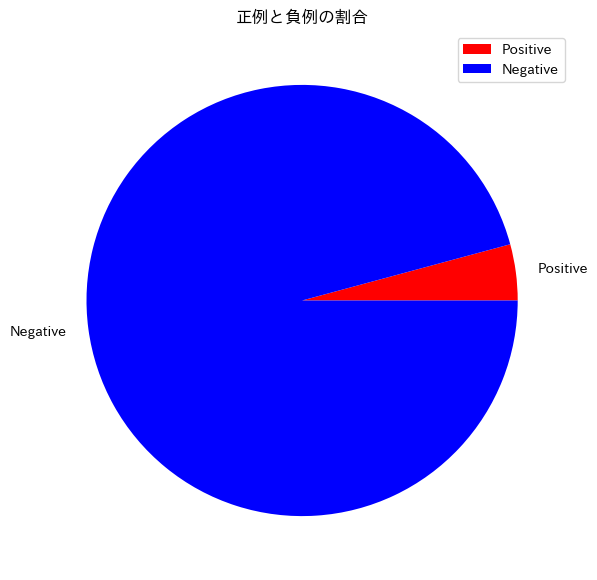

In [25]:
# 円グラフの表示

plt.figure(figsize=(7,7))
plt.pie(x=[len(pos), len(neg)], labels=['Positive', 'Negative'], colors=['red', 'blue'])
plt.legend()
plt.title('正例と負例の割合')
plt.show()

In [26]:
def get_dims(file):
    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h, w, d = arr.shape
    return h, w, d

In [27]:
# from pathlib import Path

# # フォルダのパスを指定
# folder_path = Path(INPUT_PATH + '/train')

# # ファイル数をカウント
# file_count = sum(1 for f in folder_path.iterdir() if f.is_file())

# print(f"フォルダ内のファイル数: {file_count}")

画像形状: (32, 32, 7)
ラベル: 0


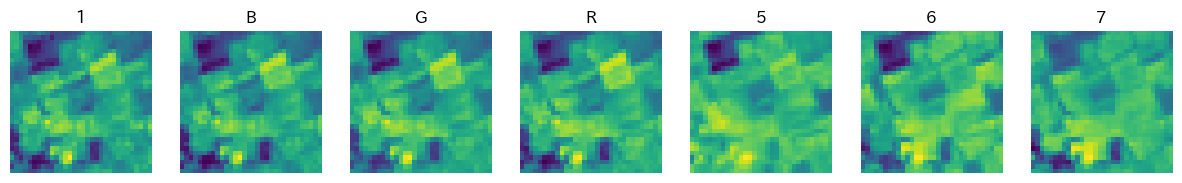

In [36]:
# 学習データからランダムで1枚取り出して表示

train_size = len(train_master) #学習データのサイズ
idx = random.randint(0, train_size-1) #0から学習データ数の範囲でランダムで整数を抽出
file = train_master['file_name'][idx] #画像ファイル名
label = train_master['flag'][idx] #画像ラベル
img_path = INPUT_PATH / f'train/{file}' #画像が格納されているパス
img = io.imread(img_path) #画像を開く
print(f'画像形状: {img.shape}')

# チャネルごとに表示
channel_label = ['1', 'B', 'G', 'R', '5', '6', '7']
print(f'ラベル: {label}')
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 5))
for i in range(7):
    ax[i].imshow(img[:, :, i])
    ax[i].set_title(channel_label[i])
    ax[i].set_axis_off()
plt.show()

正例サンプル


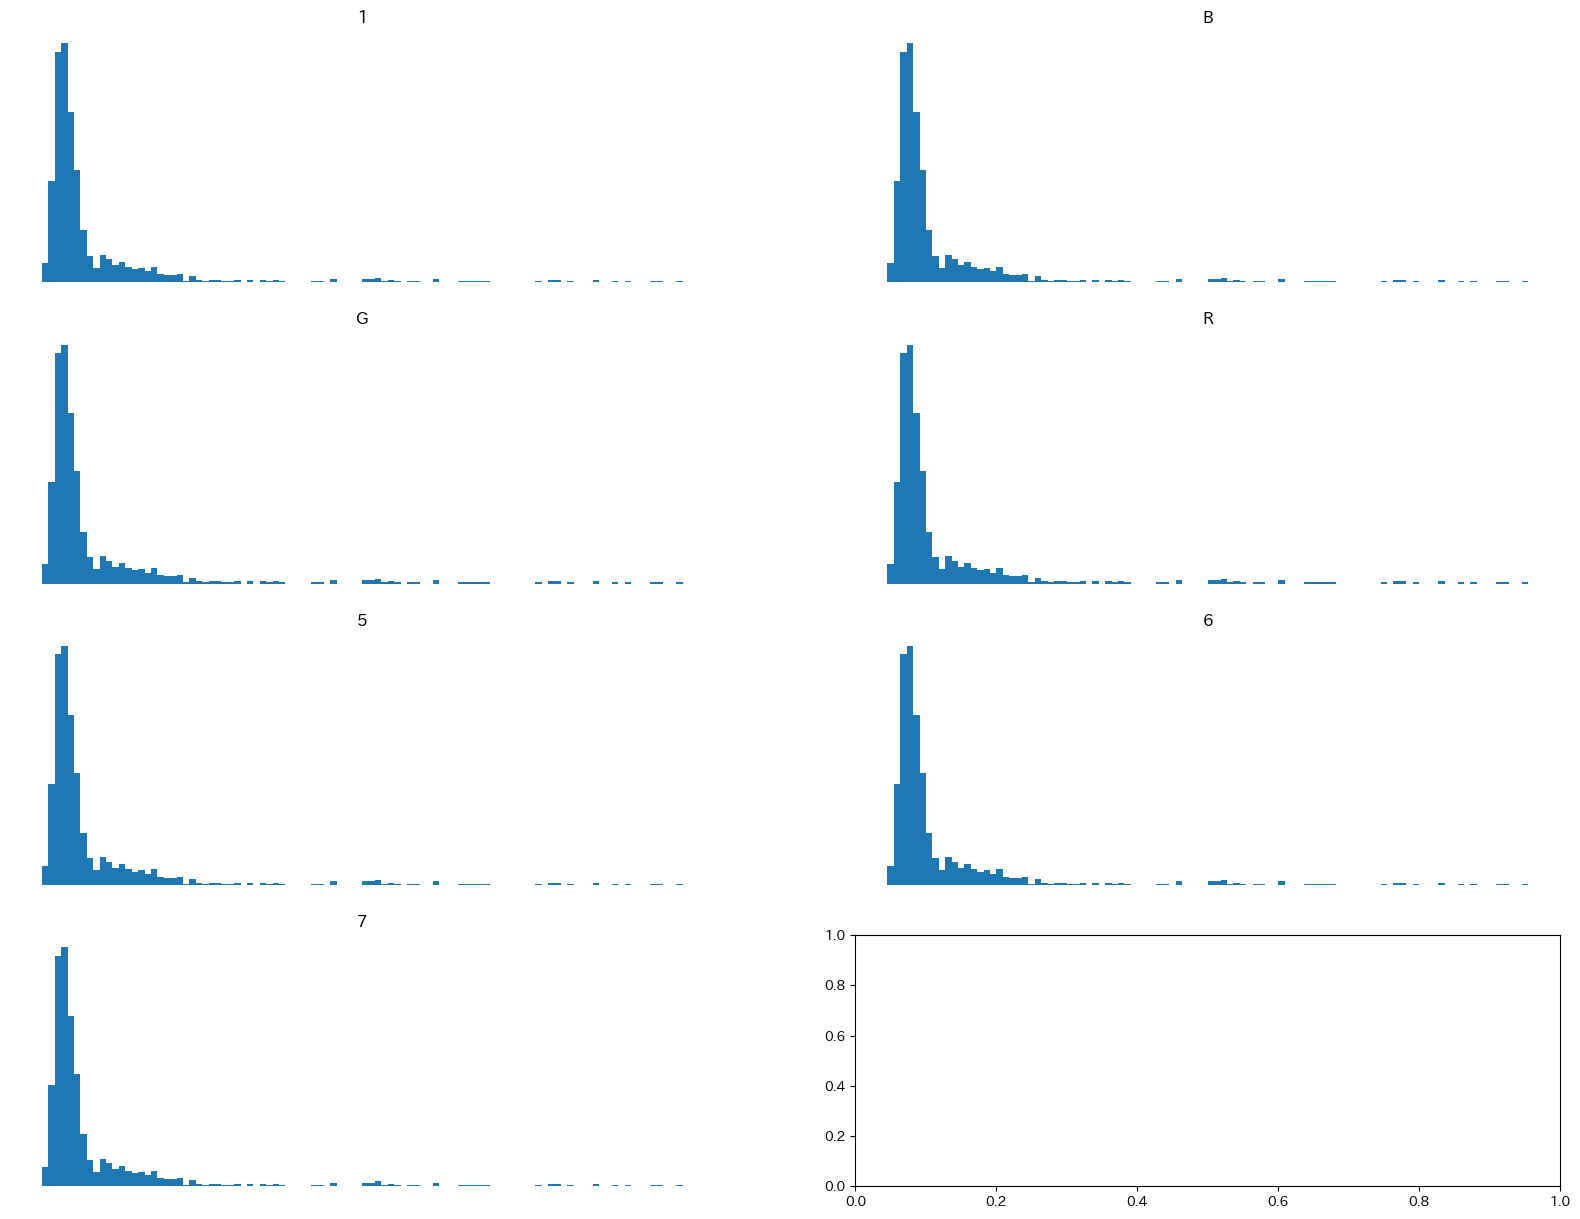

In [37]:
# 正例チャネル別ヒストグラム(単一データ)
idx = random.choice(pos.index.to_list())
file = train_master['file_name'][idx]
img_path = INPUT_PATH / f'train/{file}'
pos_img = io.imread(img_path)

print('正例サンプル')
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(7):
    if i % 2 == 0:
        ax[i//2,0].hist(pos_img[:,:,0].ravel(), bins=100)
        ax[i//2,0].set_title(channel_label[i])
        ax[i//2,0].set_axis_off()
    else:
        ax[i//2,1].hist(pos_img[:,:,0].ravel(), bins=100)
        ax[i//2,1].set_title(channel_label[i])
        ax[i//2,1].set_axis_off()
plt.show()

負例サンプル


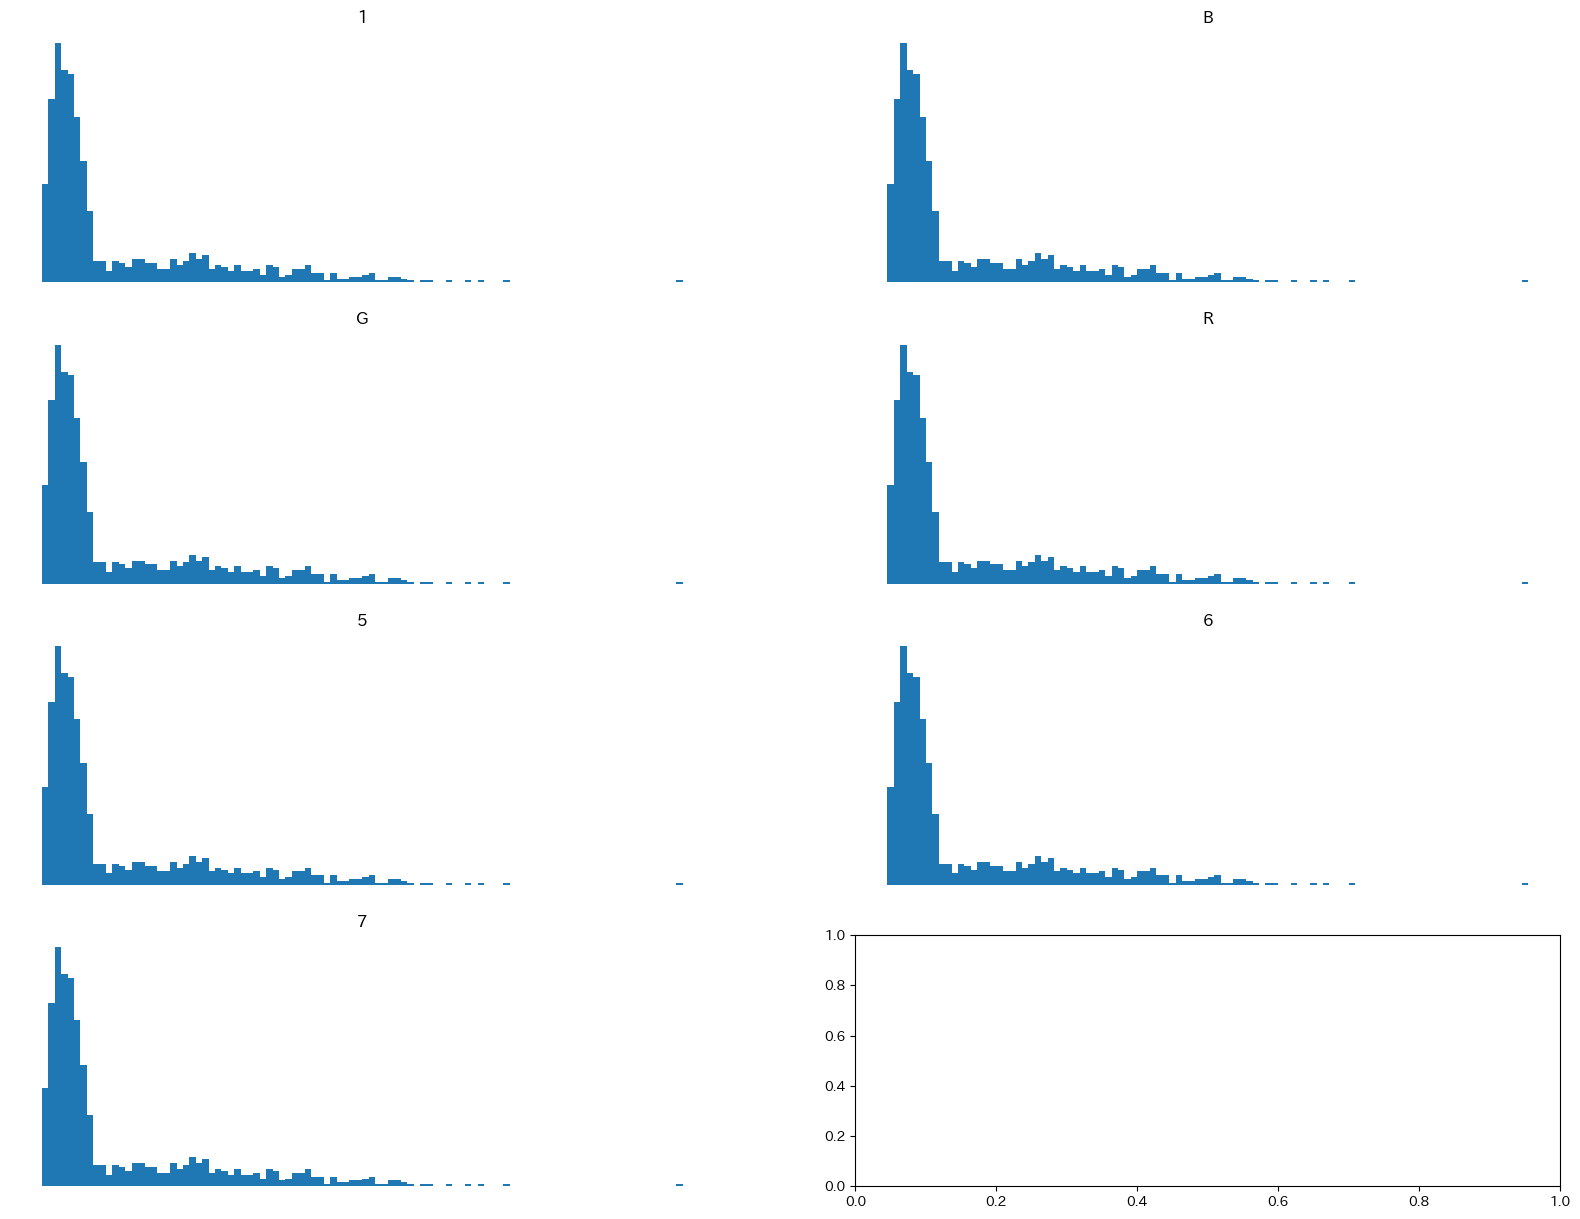

In [39]:
# 負例チャネル別ヒストグラム(単一データ)
idx = random.choice(neg.index.to_list())
file = train_master['file_name'][idx]
img_path = INPUT_PATH / f'train/{file}'
neg_img = io.imread(img_path)

print('負例サンプル')
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(7):
    if i % 2 == 0:
        ax[i//2,0].hist(neg_img[:,:,0].ravel(), bins=100)
        ax[i//2,0].set_title(channel_label[i])
        ax[i//2,0].set_axis_off()
    else:
        ax[i//2,1].hist(neg_img[:,:,0].ravel(), bins=100)
        ax[i//2,1].set_title(channel_label[i])
        ax[i//2,1].set_axis_off()
plt.show()

In [40]:
# 関数定義
def get_stats(x_array, round_num=2):
    '''
    ndarrayから得られる統計量をPythonのlist型で返す
    '''
    # 次元によらない統計量を出す
    if x_array.ndim != 1:
        x_array = x_array.ravel()

    max = x_array.max()
    min = x_array.min()
    std = round(x_array.std(), round_num)
    mean = round(x_array.mean(), round_num)
    percentile_1 = np.percentile(x_array, 1)
    percentile_5 = np.percentile(x_array, 5)
    percentile_25 = np.percentile(x_array, 25)
    percentile_75 = np.percentile(x_array, 75)
    percentile_95 = np.percentile(x_array, 95)
    percentile_99 = np.percentile(x_array, 99)

    return [max, min, std, mean, percentile_1, percentile_5, percentile_25, percentile_75, percentile_95, percentile_99]

In [41]:
# DataFrameで可視化
pos_channel_data = [get_stats(pos_img[:,:,i]) for i in range(7)]
pos_stats = pd.DataFrame(data=pos_channel_data,
                         columns=['max', 'min', 'std', 'mean', '1%', '5%', '25%', '75%', '95%', '99%'],
                         index=channel_label)
neg_channel_data = [get_stats(neg_img[:,:,i]) for i in range(7)]
neg_stats = pd.DataFrame(data=neg_channel_data,
                         columns=['max', 'min', 'std', 'mean', '1%', '5%', '25%', '75%', '95%', '99%'],
                         index=channel_label)
print('正例データ統計量(サンプル数1)')
display(pos_stats)
print('\n負例データ統計量(サンプル数1)')
display(neg_stats)

正例データ統計量(サンプル数1)


,max,min,std,mean,1%,5%,25%,75%,95%,99%
1,12325.0,8973.0,447.36,9256.14,9005.23,9026.15,9067.00,9212.00,9993.95,11648.71
B,12279.0,8030.0,565.01,8377.62,8065.00,8095.00,8137.00,8321.25,9344.55,11419.18
G,13442.0,7058.0,788.80,7701.32,7148.15,7219.15,7344.00,7703.25,8931.35,11748.49
R,14274.0,6175.0,1013.79,6836.57,6256.69,6302.00,6390.50,6777.50,8377.65,12090.01
5,21642.0,6638.0,1832.15,14667.95,10769.48,11924.50,13571.00,15581.75,18227.60,19780.39
6,17776.0,5564.0,1568.44,9913.21,7502.23,7944.30,8805.25,10590.25,12758.25,14946.78
7,14120.0,5306.0,1186.92,7251.14,6017.61,6166.35,6538.75,7515.50,9600.00,12291.59



負例データ統計量(サンプル数1)


,max,min,std,mean,1%,5%,25%,75%,95%,99%
1,11463.0,8549.0,410.07,8896.78,8555.23,8579.00,8634.00,9054.25,9786.35,10176.08
B,11045.0,7638.0,513.76,8090.25,7664.23,7690.00,7758.00,8286.00,9236.30,9750.93
G,10446.0,6552.0,643.96,7393.43,6647.38,6734.30,6928.00,7647.25,8729.55,9349.99
R,11571.0,5875.0,890.21,6680.83,5940.00,5989.15,6103.75,6993.50,8668.00,9246.01
5,20277.0,5536.0,2882.36,12104.83,5947.43,7755.15,9896.25,14000.00,17244.35,18824.11
6,16825.0,5191.0,2025.51,8765.22,5541.79,6226.40,7048.75,10206.25,12494.05,13580.50
7,13133.0,5132.0,1560.26,6978.45,5346.46,5547.00,5888.00,7278.00,10537.20,11517.12


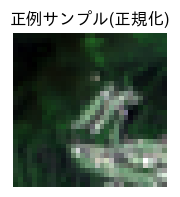

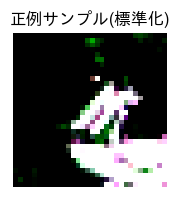

In [43]:
# ランダムでサンプリング
idx = random.choice(pos.index.to_list())
#idx = random.choice(neg.index.to_list())
file = train_master['file_name'][idx]
img_path = INPUT_PATH / f'./train/{file}'
img = io.imread(img_path)

# RGBチャネルを抜き出して(両端1%クリッピング&)正規化したうえで結合
r_channel = img[:, :, 3]
r_max, r_min = r_channel.ravel().max(), r_channel.ravel().min()
r_mean, r_std = r_channel.ravel().mean(), r_channel.ravel().std()
#r_max, r_min = np.percentile(r_channel.ravel(), 99), np.percentile(r_channel.ravel(), 1)
#r_channel = r_channel.clip(min=r_min, max=r_max)
r_channel_scaled = (r_channel - r_min) / (r_max - r_min)
r_channel_normalized = (r_channel - r_mean) / r_std
r_channel = r_channel[:, :, np.newaxis]
r_channel_scaled = r_channel_scaled[:, :, np.newaxis]
r_channel_normalized = r_channel_normalized[:, :, np.newaxis]

g_channel = img[:, :, 2]
g_max, g_min = g_channel.ravel().max(), g_channel.ravel().min()
g_mean, g_std = g_channel.ravel().mean(), g_channel.ravel().std()
#g_max, g_min = np.percentile(g_channel.ravel(), 99), np.percentile(g_channel.ravel(), 1)
#g_channel = g_channel.clip(min=g_min, max=g_max)
g_channel_scaled = (g_channel - g_min) / (g_max - g_min)
g_channel_normalized = (g_channel - g_mean) / g_std
g_channel = g_channel[:, :, np.newaxis]
g_channel_scaled = g_channel_scaled[:, :, np.newaxis]
g_channel_normalized = g_channel_normalized[:, :, np.newaxis]

b_channel = img[:, :, 1]
b_max, b_min = b_channel.ravel().max(), b_channel.ravel().min()
b_mean, b_std = b_channel.ravel().mean(), b_channel.ravel().std()
#b_max, b_min = np.percentile(b_channel.ravel(), 99), np.percentile(b_channel.ravel(), 1)
#b_channel = b_channel.clip(min=b_min, max=b_max)
b_channel_scaled = (b_channel - b_min) / (b_max - b_min)
b_channel_normalized = (b_channel - b_mean) / b_std
b_channel = b_channel[:, :, np.newaxis]
b_channel_scaled = b_channel_scaled[:, :, np.newaxis]
b_channel_normalized = b_channel_normalized[:, :, np.newaxis]

rgb_img = np.concatenate([r_channel, g_channel], axis=2)
rgb_img = np.concatenate([rgb_img, b_channel], axis=2)
rgb_img_scaled = np.concatenate([r_channel_scaled, g_channel_scaled], axis=2)
rgb_img_scaled = np.concatenate([rgb_img_scaled, b_channel_scaled], axis=2)
rgb_img_normalized = np.concatenate([r_channel_normalized, g_channel_normalized], axis=2)
rgb_img_normalized = np.concatenate([rgb_img_normalized, b_channel_normalized], axis=2)
rgb_img_normalized = np.clip(rgb_img_normalized, 0, 1)

# 画像表示
#print('ラベル: 正例')
plt.figure(figsize=(2, 2))
plt.imshow(rgb_img_scaled)
plt.title('正例サンプル(正規化)')
plt.axis('off')
plt.show()
plt.figure(figsize=(2, 2))
plt.imshow(rgb_img_normalized)
plt.title('正例サンプル(標準化)')
plt.axis('off')
plt.show()

前処理

In [44]:
# (H,W,C)から(C,H,W)へ変換
pos_img = pos_img.transpose(2, 0, 1)
pos_img.shape

(7, 32, 32)

In [45]:
# テンソル変換
pos_img_torch = torch.from_numpy(pos_img.astype(np.float32)).clone()
pos_img_torch.shape

torch.Size([7, 32, 32])

In [46]:
# 正規化
norm = transforms.Normalize((0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5), (0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5))
norm(pos_img_torch)

tensor([[[18617., 19007., 18729.,  ..., 18255., 18447., 18473.],
         [18389., 18951., 18849.,  ..., 18965., 18871., 18927.],
         [18593., 18525., 18749.,  ..., 18831., 18693., 18413.],
         ...,
         [18249., 18193., 18219.,  ..., 18099., 18095., 17997.],
         [18235., 18209., 18281.,  ..., 18121., 18057., 17961.],
         [18205., 18181., 18211.,  ..., 18049., 18053., 18019.]],

        [[16977., 17495., 17153.,  ..., 16377., 16717., 16777.],
         [16659., 17421., 17241.,  ..., 17317., 17223., 17351.],
         [16883., 16831., 17083.,  ..., 17179., 16983., 16587.],
         ...,
         [16397., 16387., 16403.,  ..., 16227., 16223., 16129.],
         [16337., 16369., 16417.,  ..., 16251., 16161., 16059.],
         [16353., 16335., 16351.,  ..., 16191., 16221., 16197.]],

        [[16121., 17609., 16379.,  ..., 14825., 15479., 15901.],
         [15369., 17083., 16807.,  ..., 16443., 16681., 17005.],
         [16045., 15907., 16483.,  ..., 16871., 15821., 15

In [47]:
# 中央くり抜き
centercrop = transforms.CenterCrop(16)
centercrop(pos_img_torch)

tensor([[[ 9123.,  9106.,  9157.,  ...,  9077.,  9054.,  9074.],
         [ 9227.,  9129.,  9152.,  ...,  9091.,  9075.,  9070.],
         [ 9201.,  9134.,  9136.,  ...,  9091.,  9066.,  9044.],
         ...,
         [ 9101.,  9051.,  9085.,  ...,  9043.,  9059.,  9079.],
         [ 9344.,  9086.,  9083.,  ...,  9054.,  9110.,  9065.],
         [ 9743.,  9281.,  9088.,  ...,  9077.,  9096.,  9042.]],

        [[ 8193.,  8182.,  8222.,  ...,  8118.,  8117.,  8125.],
         [ 8344.,  8205.,  8218.,  ...,  8130.,  8136.,  8135.],
         [ 8331.,  8217.,  8222.,  ...,  8126.,  8133.,  8119.],
         ...,
         [ 8172.,  8140.,  8173.,  ...,  8111.,  8138.,  8169.],
         [ 8483.,  8159.,  8176.,  ...,  8126.,  8179.,  8148.],
         [ 8970.,  8417.,  8177.,  ...,  8173.,  8178.,  8104.]],

        [[ 7461.,  7359.,  7452.,  ...,  7293.,  7371.,  7386.],
         [ 7809.,  7423.,  7460.,  ...,  7298.,  7386.,  7384.],
         [ 7570.,  7439.,  7405.,  ...,  7278.,  7324.,  7

パイプライン

In [48]:
class ImageTransform:
    '''
    画像の前処理クラス
    学習時と検証時で挙動を変える
    外れ値があるためクリッピング→正規化

    Attributes
    --------------------
    min :
    mean : tupple
        各チャネルの平均値
    std : tupple
        各チャネルの標準偏差
    '''
    def __init__(self):
        self.data_transform = {
            'train': transforms.Compose([
                transforms.ToTensor(), #テンソル変換
                transforms.RandomHorizontalFlip(), #水平反転(ランダム)
                transforms.RandomVerticalFlip(), #垂直反転(ランダム)
                transforms.RandomAffine([-30, 30]), #回転(ランダム)
                #transforms.Normalize(mean, std) #標準化
            ]),
            'val': transforms.Compose([
                transforms.ToTensor(), #テンソル変換
                #transforms.Normalize(mean, std) #標準化
            ])
        }
    def __call__(self, img, phase='train'):
        return self.data_transform[phase](img)

In [49]:
# パイプライン使用
'''plt.imshow(rgb_img_scaled)
plt.title('変換前(正規化して表示)')
plt.show()

rgb_img_trans = rgb_img
#rgb_img_trans = rgb_img.transpose(2, 0, 1)
mean = (r_mean, g_mean, b_mean)
std = (r_std, g_std, b_std)
transform = ImageTransform(mean, std)
rgb_img_trans = transform(rgb_img_trans, phase='train')
rgb_img_trans = rgb_img_trans.numpy().transpose((1, 2, 0))
rgb_img_trans = np.clip(rgb_img_trans, 0, 1)
plt.imshow(rgb_img_trans)
plt.title('変換後')
plt.show()'''

"plt.imshow(rgb_img_scaled)\nplt.title('変換前(正規化して表示)')\nplt.show()\n\nrgb_img_trans = rgb_img\n#rgb_img_trans = rgb_img.transpose(2, 0, 1)\nmean = (r_mean, g_mean, b_mean)\nstd = (r_std, g_std, b_std)\ntransform = ImageTransform(mean, std)\nrgb_img_trans = transform(rgb_img_trans, phase='train')\nrgb_img_trans = rgb_img_trans.numpy().transpose((1, 2, 0))\nrgb_img_trans = np.clip(rgb_img_trans, 0, 1)\nplt.imshow(rgb_img_trans)\nplt.title('変換後')\nplt.show()"

In [55]:
train_dir = INPUT_PATH / 'train/'

class AistDataset(Dataset):
    def __init__(self, dir, file_list, min, max, transform=None, phase='train', channel='RGB'):
        '''
        衛星画像の学習用データセット

        Attributes
        -------------------
        dir : str
            画像が保管されているパス
        file_list : dataframe
            画像のファイル名とフラグが格納されているデータフレーム
        min : int
            画素値の最小値(クリッピング用)
        max : int
            画素値の最大値(クリッピング用)
        transform : torchvision.transforms.Compose
            前処理パイプライン
        phase : str
            学習か検証かを選択
        channel : str
            使用するチャネル(初期値はRGB)
        '''
        self.dir = dir
        self.file_list = file_list
        self.transform = transform
        self.phase = phase
        self.image_path = file_list['file_name'].to_list()
        self.image_label = file_list['flag'].to_list()
        self.channel = channel
        self.min = min
        self.max = max

    def __len__(self):
        return len(self.image_path)

    def __getitem__(self, idx):
        # 画像をロード
        img_path = self.image_path[idx]
        img = io.imread(self.dir/ img_path)
        img = np.clip(img, self.min, self.max)
        img = (img - self.min) / (self.max - self.min)
        # RGB指定があれば次元を限定する
        if self.channel == 'RGB':
            img = img[:, :, 1:4] #BGR
        # 前処理の実装
        if self.transform:
            img = self.transform(img, self.phase)
        label = self.image_label[idx]

        return img, label

In [56]:
'''# 標準化のための平均値と標準偏差を計算
# メモリの都合上10万枚ごとにまとめる

device = 'cuda' if torch.cuda.is_available() else 'cpu'
tmp_set = 1
cnt = 1
# 1.train_masterからファイルパスを抽出
for i, file in enumerate(train_master['file_name'].to_list()):
    # 2.ndarrayで読み込み
    tmp = io.imread(f'./train/{file}')
    tmp = tmp[np.newaxis, :, :, :] #(H,W,C)で読み込まれるため(B,H,W,C)に変換
    # 3.tensorに変換
    tmp = torch.from_numpy(tmp.astype(np.float32)).clone()
    # 4.cudaに移す
    tmp = tmp.to(device)
    # 5.次元拡張
    #tmp = torch.unsqueeze(tmp, dim=0)
    # 6.データ結合
    if i == 0:
        train_data = tmp
        train_data = train_data.to(device)
    elif tmp_set != cnt:
        train_data = tmp
        train_data = train_data.to(device)
        tmp_set = cnt
    else:
        train_data = torch.cat([train_data, tmp], dim=0)
    if (i+1) % 10000 == 0:
        print(f'{i+1}枚目')
    if (i+1) % 100000 == 0 or i == len(train_master)-1:
        # 7.ndarrayに変換
        train_data = train_data.to('cpu').detach().numpy().copy()
        # 8.保存
        path = f'/content/drive/MyDrive/Signate/AIST/ndarray/train_{cnt}'
        np.save(path, train_data)
        cnt += 1

# 9.読み込みと結合
train_data_1 = np.load('/content/drive/MyDrive/Signate/AIST/ndarray/train_1.npy')
train_data_2 = np.load('/content/drive/MyDrive/Signate/AIST/ndarray/train_2.npy')
train_data_3 = np.load('/content/drive/MyDrive/Signate/AIST/ndarray/train_4.npy')
train_data = np.concatenate([train_data_1, train_data_2], axis=0)

# 10.形状は[B,H,W,C]となっているためチャネルごと(4次元)の平均と標準偏差を算出する
band_1_mean = np.mean(train_data[:, :, :, 0].flatten())
band_b_mean = np.mean(train_data[:, :, :, 1].flatten())
band_g_mean = np.mean(train_data[:, :, :, 2].flatten())
band_r_mean = np.mean(train_data[:, :, :, 3].flatten())
band_5_mean = np.mean(train_data[:, :, :, 4].flatten())
band_6_mean = np.mean(train_data[:, :, :, 5].flatten())
band_7_mean = np.mean(train_data[:, :, :, 6].flatten())
band_1_std = np.std(train_data[:, :, :, 0].flatten())
band_b_std = np.std(train_data[:, :, :, 1].flatten())
band_g_std = np.std(train_data[:, :, :, 2].flatten())
band_r_std = np.std(train_data[:, :, :, 3].flatten())
band_5_std = np.std(train_data[:, :, :, 4].flatten())
band_6_std = np.std(train_data[:, :, :, 5].flatten())
band_7_std = np.std(train_data[:, :, :, 6].flatten())
bgr_mean = (band_b_mean, band_g_mean, band_r_mean)
bgr_std = (band_b_std, band_g_std, band_r_std)'''

"# 標準化のための平均値と標準偏差を計算\n# メモリの都合上10万枚ごとにまとめる\n\ndevice = 'cuda' if torch.cuda.is_available() else 'cpu'\ntmp_set = 1\ncnt = 1\n# 1.train_masterからファイルパスを抽出\nfor i, file in enumerate(train_master['file_name'].to_list()):\n    # 2.ndarrayで読み込み\n    tmp = io.imread(f'./train/{file}')\n    tmp = tmp[np.newaxis, :, :, :] #(H,W,C)で読み込まれるため(B,H,W,C)に変換\n    # 3.tensorに変換\n    tmp = torch.from_numpy(tmp.astype(np.float32)).clone()\n    # 4.cudaに移す\n    tmp = tmp.to(device)\n    # 5.次元拡張\n    #tmp = torch.unsqueeze(tmp, dim=0)\n    # 6.データ結合\n    if i == 0:\n        train_data = tmp\n        train_data = train_data.to(device)\n    elif tmp_set != cnt:\n        train_data = tmp\n        train_data = train_data.to(device)\n        tmp_set = cnt\n    else:\n        train_data = torch.cat([train_data, tmp], dim=0)\n    if (i+1) % 10000 == 0:\n        print(f'{i+1}枚目')\n    if (i+1) % 100000 == 0 or i == len(train_master)-1:\n        # 7.ndarrayに変換\n        train_data = train_data.to('cpu').detach().n

In [57]:
# 統計値の可視化: 1%と99%付近の値(min3600,max23500くらいでクリッピング)
'''train_channel_data = [get_stats(train_data[:,:,i]) for i in range(7)]
train_stats = pd.DataFrame(data=train_channel_data,
                         columns=['max', 'min', 'std', 'mean', '1%', '5%', '25%', '75%', '95%', '99%'],
                         index=channel_label)
display(train_stats)'''

"train_channel_data = [get_stats(train_data[:,:,i]) for i in range(7)]\ntrain_stats = pd.DataFrame(data=train_channel_data,\n                         columns=['max', 'min', 'std', 'mean', '1%', '5%', '25%', '75%', '95%', '99%'],\n                         index=channel_label)\ndisplay(train_stats)"

In [58]:
# 学習用、検証用、評価用に分割(デフォルトは6:2:2とする)


train_size = 0.6
test_size = 0.5
train_files, eval_files, train_labels, eval_labels = train_test_split(train_master['file_name'], train_master['flag'], test_size=(1-train_size)*test_size, stratify=train_master['flag'], random_state=0)
#valid_files, eval_files, valid_labels, eval_labels = train_test_split(valid_files, valid_labels, test_size=test_size, stratify=valid_labels, random_state=0)
#ここで正例と負例の割合を1:1にするアンダーサンプリング
train_files, valid_files, train_labels, valid_labels = train_test_split(train_files, train_labels, test_size=test_size*train_size, stratify=train_labels, random_state=0)

print(f'学習用データサイズ: {len(train_files)}')
print(f'検証用データサイズ: {len(valid_files)}')
print(f'評価用データサイズ: {len(eval_files)}')
print(f'学習用データ正例比率: {train_labels.mean()}')
print(f'検証用データ正例比率: {valid_labels.mean()}')
print(f'評価用データ正例比率: {eval_labels.mean()}')

train_data = train_master.loc[train_master.index.isin(train_files.index)].reset_index(drop=True)
valid_data = train_master.loc[train_master.index.isin(valid_files.index)].reset_index(drop=True)
eval_data = train_master.loc[train_master.index.isin(eval_files.index)].reset_index(drop=True)

train_dataset = AistDataset(dir=train_dir, file_list=train_data, min=3600, max=23500, transform=ImageTransform(), phase='train', channel='RGB')
valid_dataset = AistDataset(dir=train_dir, file_list=valid_data, min=3600, max=23500, transform=ImageTransform(), phase='val', channel='RGB')
eval_dataset = AistDataset(dir=train_dir, file_list=eval_data, min=3600, max=23500, transform=ImageTransform(), phase='val', channel='RGB')

学習用データサイズ: 165861
検証用データサイズ: 71084
評価用データサイズ: 59237
学習用データ正例比率: 0.04201108156830117
検証用データ正例比率: 0.04200664003151201
評価用データ正例比率: 0.04200077654168847


In [59]:
# それぞれのデータセットからランダムサンプリングを行い挙動を確認
tr_idx = random.randint(0, len(train_dataset))
val_idx = random.randint(0, len(valid_dataset))
eval_idx = random.randint(0, len(eval_dataset))

tr_sample = train_dataset[tr_idx]
val_sample = valid_dataset[val_idx]
eval_sample = eval_dataset[eval_idx]

print(f'学習用データサンプル形状: {tr_sample[0].shape}')
print(f'学習用データサンプルラベル: {tr_sample[1]}')
print(f'検証用データサンプル形状: {val_sample[0].shape}')
print(f'検証用データサンプルラベル: {val_sample[1]}')
print(f'評価用データサンプル形状: {eval_sample[0].shape}')
print(f'評価用データサンプルラベル: {eval_sample[1]}')

学習用データサンプル形状: torch.Size([3, 32, 32])
学習用データサンプルラベル: 0
検証用データサンプル形状: torch.Size([3, 32, 32])
検証用データサンプルラベル: 0
評価用データサンプル形状: torch.Size([3, 32, 32])
評価用データサンプルラベル: 0


In [60]:
# デバイスの設定
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# ResNet18の読み込み
model = models.resnet18(pretrained=True)
# model = models.resnet34(pretrained=True)

# model = models.googlenet(pretrained=True)
# model = models.mobilenet_v2(pretrained=True)
# model = models.mobilenet_v1(pretrained=True)


model = model.to(device)

# ハイパーパラメータの設定
num_epoch = 25
lr = 0.005
batch_size = 1024
train_ratio = 0.75
weight_decay = 5e-4
momentum = 0.9
save_interval = 1  # 保存する間隔（エポック単位）


# 最適化アルゴリズムと損失関数の設定
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

# 評価指標IoUの設計(pytorchのtensorを想定)
def IoU(predicts, labels):
    outs = predicts.max(1)[1]
    # TP
    p_true_ids = torch.nonzero(outs) #正例と予測したインスタンスのインデックス番号
    tp = (outs[p_true_ids]==labels[p_true_ids]).sum().item()
    # FN+FP
    fn_plus_fp = (outs!=labels).sum().item()
    return tp / (tp+fn_plus_fp)

# DataLoader
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
validloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

cuda


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 110MB/s]


In [61]:
model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [62]:
model.fc = nn.Linear(in_features=512, out_features=2, bias=True)#2048 res50
model = model.to(device)

In [ ]:
train_loss_list = []
train_iou_list = []
valid_loss_list = []
valid_iou_list = []

for epoch in range(num_epoch):
    train_loss = 0
    train_iou = 0
    valid_loss = 0
    valid_iou = 0

    # 訓練モード
    model.train()
    for i, (imgs, labels) in enumerate(trainloader):
        imgs = imgs.float()
        imgs, labels = imgs.to(device), labels.to(device)
        # 勾配のリセット
        optimizer.zero_grad()
        # 出力
        outputs = model(imgs)
        # 損失計算
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        # ioc
        train_iou += IoU(outputs, labels)
        # 逆伝播
        loss.backward()
        optimizer.step()
    avg_train_loss = train_loss / len(trainloader.dataset)
    avg_train_iou = train_iou / (i+1)

    # 検証モード
    model.eval()
    with torch.no_grad():
        for i, (imgs, labels) in enumerate(validloader):
            imgs, labels = imgs.to(device), labels.to(device)
            imgs = imgs.float()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            valid_iou += IoU(outputs, labels)
    avg_val_loss = valid_loss / len(validloader.dataset)
    avg_val_iou = valid_iou / (i+1)
    print(
        f"Epoch [{epoch + 1}/{num_epoch}], "
        f"Loss: {avg_train_loss:.4f}, "
        f"val_loss: {avg_val_loss:.4f}, "
        f"train_iou: {avg_train_iou:.4f}, "
        f"val_iou: {avg_val_iou:.4f}"
    )
    tmp_loss_list = valid_loss_list
    train_loss_list.append(avg_train_loss)
    train_iou_list.append(avg_train_iou)
    valid_loss_list.append(avg_val_loss)
    valid_iou_list.append(avg_val_iou)

    # 重みを保存
    if (epoch + 1) % save_interval == 0 or (epoch + 1) == num_epoch:
        checkpoint_path = EXP_MODEL + f"{name}_resnet18_checkpoint_epoch_{epoch+1}.pth"
        torch.save(
            {
                "epoch": epoch + 1,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "train_loss": train_loss,
                "val_loss": valid_loss,
                "valid_iou": valid_iou,
            },
            checkpoint_path,
        )
        print(f"Model checkpoint saved at {checkpoint_path}")

Epoch [1/25], Loss: 0.0002, val_loss: 0.0001, train_iou: 0.1000, val_iou: 0.0809
Model checkpoint saved at /content/drive/MyDrive/Python/SIGNATE/Satellite/output/base_Resnet18/model/base_Resnet18_resnet18_checkpoint_epoch_1.pth
Epoch [2/25], Loss: 0.0001, val_loss: 0.0001, train_iou: 0.1909, val_iou: 0.2135
Model checkpoint saved at /content/drive/MyDrive/Python/SIGNATE/Satellite/output/base_Resnet18/model/base_Resnet18_resnet18_checkpoint_epoch_2.pth
Epoch [3/25], Loss: 0.0001, val_loss: 0.0001, train_iou: 0.2434, val_iou: 0.2664
Model checkpoint saved at /content/drive/MyDrive/Python/SIGNATE/Satellite/output/base_Resnet18/model/base_Resnet18_resnet18_checkpoint_epoch_3.pth
Epoch [4/25], Loss: 0.0001, val_loss: 0.0001, train_iou: 0.2699, val_iou: 0.2931
Model checkpoint saved at /content/drive/MyDrive/Python/SIGNATE/Satellite/output/base_Resnet18/model/base_Resnet18_resnet18_checkpoint_epoch_4.pth
Epoch [5/25], Loss: 0.0001, val_loss: 0.0001, train_iou: 0.3043, val_iou: 0.2408
Model c

In [66]:
#学習の再開
# 保存したモデルの読み込み
train_loss_list = []
train_iou_list = []
valid_loss_list = []
valid_iou_list = []


epoch = 23 #最後のエポック数 タイトル-1
checkpoint_path = EXP_MODEL + f"/{name}_resnet18_checkpoint_epoch_{epoch+1}.pth"
checkpoint = torch.load(checkpoint_path)

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']
train_loss = checkpoint['train_loss']
valid_loss = checkpoint['val_loss']
valid_iou = checkpoint['valid_iou']



print(f"Resuming from epoch {start_epoch} with loss {train_loss:.4f}")



# 再開後の学習
for epoch in range(start_epoch, num_epoch):
    train_loss = 0
    train_iou = 0
    valid_loss = 0
    valid_iou = 0
    # 学習ループの続き
   # 訓練モード
    model.train()
    for i, (imgs, labels) in enumerate(trainloader):
        imgs = imgs.float()
        imgs, labels = imgs.to(device), labels.to(device)
        # 勾配のリセット
        optimizer.zero_grad()
        # 出力
        outputs = model(imgs)
        # 損失計算
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        # iou
        train_iou += IoU(outputs, labels)
        # 逆伝播
        loss.backward()
        optimizer.step()
    avg_train_loss = train_loss / len(trainloader.dataset)
    avg_train_iou = train_iou / (i+1)

    # 検証モード
    model.eval()
    with torch.no_grad():
        for i, (imgs, labels) in enumerate(validloader):
            imgs, labels = imgs.to(device), labels.to(device)
            imgs = imgs.float()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            valid_iou += IoU(outputs, labels)
    avg_val_loss = valid_loss / len(validloader.dataset)
    avg_val_iou = valid_iou / (i+1)
    print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, train_iou: {train_iou:.4f}, val_iou: {val_iou:.4f}'
                   .format(epoch+1, num_epoch, i+1, loss=avg_train_loss, val_loss=avg_val_loss, train_iou=avg_train_iou, val_iou=avg_val_iou))
    tmp_loss_list = valid_loss_list
    train_loss_list.append(avg_train_loss)
    train_iou_list.append(avg_train_iou)
    valid_loss_list.append(avg_val_loss)
    valid_iou_list.append(avg_val_iou)

    # 重みを保存
    if (epoch + 1) % save_interval == 0 or (epoch + 1) == num_epoch:
        checkpoint_path = EXP_MODEL + f"/{name}_resnet18_checkpoint_epoch_{epoch+1}.pth"
        torch.save(
            {
                "epoch": epoch + 1,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "train_loss": train_loss,
                "train_iou": train_iou,
                "val_loss": valid_loss,
                "valid_iou": valid_iou,
            },
            checkpoint_path,
        )
        print(f"Model checkpoint saved at {checkpoint_path}")

Resuming from epoch 24 with loss 11.5250
Epoch [25/25], Loss: 0.0001, val_loss: 0.0001, train_iou: 0.5007, val_iou: 0.5300
Model checkpoint saved at /content/drive/MyDrive/Python/SIGNATE/Satellite/output/base01_Resnet18/model/base01_Resnet18_resnet18_checkpoint_epoch_25.pth


In [70]:
# model_path = EXP_MODEL + f"/{name}.pth"
# torch.save(model.state_dict(), model_path)
last_epoch = 25
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model = models.resnet50()
model = models.resnet18()

model.fc = nn.Linear(in_features=512, out_features=2, bias=True)
# model.load_state_dict(torch.load(EXP_MODEL + f"/{name}_resnet18_checkpoint_epoch_{last_epoch}.pth"))

checkpoint_path = EXP_MODEL + f"/{name}_resnet18_checkpoint_epoch_{last_epoch}.pth"
checkpoint = torch.load(checkpoint_path)

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']
train_loss = checkpoint['train_loss']
valid_loss = checkpoint['val_loss']
valid_iou = checkpoint['valid_iou']



model = model.to(device)

In [71]:
# DataLoaderを使う
evalloader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
eval_loss = 0
eval_iou = 0
eval_iou_list = []
model.eval()
with torch.no_grad():
    for i, (imgs, labels) in enumerate(evalloader):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs = imgs.float()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        eval_loss += loss.item()
        eval_iou += IoU(outputs, labels)
        eval_iou_list.append(IoU(outputs, labels))
avg_eval_loss = eval_loss / len(evalloader.dataset)
avg_eval_iou = eval_iou / (i+1)
print(avg_eval_iou)

0.5389147708175508


In [72]:
# 1枚ずつ推論
min, max = 3600, 23500
model.eval()
for i, file in enumerate(eval_files.values):
    # 1.ndarrayで読み込み
    img = io.imread(f'./train/{file}')
    # 2. 正規化
    img = np.clip(img, min, max)
    img = (img - min) / (max - min)
    # 3. チャネル絞り込み
    img = img[:, :, 1:4]
    # 4. 前処理
    img = np.transpose(img, (2,0,1))
    img = img[np.newaxis, :, :, :]
    img = torch.from_numpy(img.astype(np.float32)).clone()
    img = img.to(device)
    # 5. 推論
    output = model(img)
    # 6. ラベルにしてndarrayに変換
    output = output.max(1)[1].to('cpu').detach().numpy().copy()
    # 7. 結合
    if i == 0:
        prediction = output
    else:
        prediction = np.concatenate([prediction, output], axis=0)

# 8. IoU算出
eval_df = pd.DataFrame(data=[[f, pred, label] for f, pred, label in zip(eval_files.values, prediction, eval_labels.values)],
                       columns=['file_name', 'prediction', 'label'])

tp = len(eval_df.loc[(eval_df['prediction']==1) & (eval_df['label']==1)])
fp = len(eval_df.loc[(eval_df['prediction']==1) & (eval_df['label']==0)])
fn = len(eval_df.loc[(eval_df['prediction']==0) & (eval_df['label']==1)])
iou = tp / (tp + fp + fn)
print(iou)

0.5392088827203331


In [73]:
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/test_1.zip" .
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/test_2.zip" .
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/test_3.zip" .
# !cp "/content/drive/MyDrive/Python/SIGNATE/Satellite/data/test_4.zip" .


! signate download --competition-id=263 --file-id=227
! signate download --competition-id=263 --file-id=228
! signate download --competition-id=263 --file-id=229
! signate download --competition-id=263 --file-id=230
! signate download --competition-id=263 --file-id=233

test_1.zip


Download completed.
test_2.zip


Download completed.
test_3.zip


Download completed.
test_4.zip


Download completed.
sample_code.zip


Download completed.


In [74]:
!unzip test_1.zip -d /content/
!unzip test_2.zip -d /content/
!unzip test_3.zip -d /content/
!unzip test_4.zip -d /content/


ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: /content/test/test_95499.tif  
  inflating: /content/test/test_955.tif  
  inflating: /content/test/test_9550.tif  
  inflating: /content/test/test_95500.tif  
  inflating: /content/test/test_95501.tif  
  inflating: /content/test/test_95502.tif  
  inflating: /content/test/test_95503.tif  
  inflating: /content/test/test_95504.tif  
  inflating: /content/test/test_95505.tif  
  inflating: /content/test/test_95506.tif  
  inflating: /content/test/test_95507.tif  
  inflating: /content/test/test_95508.tif  
  inflating: /content/test/test_95509.tif  
  inflating: /content/test/test_9551.tif  
  inflating: /content/test/test_95510.tif  
  inflating: /content/test/test_95511.tif  
  inflating: /content/test/test_95512.tif  
  inflating: /content/test/test_95513.tif  
  inflating: /content/test/test_95514.tif  
  inflating: /content/test/test_95515.tif  
  inflating: /content/test/test_95516.tif  
  inflating: /content/test/test_95517.tif  
  in

In [75]:
# 提出形式を確認
sample_submit.columns = ['file', 'prediction']
sample_submit

,file,prediction
0,test_0.tif,0
1,test_1.tif,0
2,test_2.tif,0
3,test_3.tif,1
4,test_4.tif,1
...,...,...
428692,test_428692.tif,1
428693,test_428693.tif,0
428694,test_428694.tif,0
428695,test_428695.tif,0


In [76]:
# 1枚ずつ推論

min, max = 3600, 23500
model.eval()
for i, file in enumerate(sample_submit['file'].to_list()):
    # 1.ndarrayで読み込み
    img = io.imread(INPUT_PATH / f'test/{file}')

    # 2. 正規化
    img = np.clip(img, min, max)
    img = (img - min) / (max - min)
    # 3. チャネル絞り込み
    #img = img[:, 1:4, :, :]
    img = img[:, :, 1:4]
    # 4. 前処理
    img = np.transpose(img, (2,0,1))
    img = img[np.newaxis, :, :, :]
    img = torch.from_numpy(img.astype(np.float32)).clone()
    img = img.to(device)
    # 5. 推論
    output = model(img)
    # 6. ラベルにしてndarrayに変換
    output = output.max(1)[1].to('cpu').detach().numpy().copy()
    # 7. 結合
    if i == 0:
        prediction = output
    else:
        prediction = np.concatenate([prediction, output], axis=0)
    if (i+1) % 50000 == 0:
        print(f'{i+1}枚目まで終了')

50000枚目まで終了
100000枚目まで終了
150000枚目まで終了
200000枚目まで終了
250000枚目まで終了
300000枚目まで終了
350000枚目まで終了
400000枚目まで終了


In [77]:
file_name = sample_submit['file'].values
submit_df = pd.DataFrame(data=[[f, pred] for f, pred in zip(file_name, prediction)])
submit_df.to_csv(OUTPUT_EXP + f'/{name}_sub.tsv', sep='\t', header=None, index=None)